In [1]:
#pip install opencv-python
#pip install easygui

In [2]:
#import libraries
import cv2
import easygui
import numpy as np
import imageio
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [3]:
#build a filebos to choose a particular file
def upload():
    """
    opens the box as popup box to choose the file and store file path as string
    """
    ImagePath = easygui.fileopenbox()
    cartoonify(Imagepath)

In [180]:
def cartoonify(ImagePath):
    ##store image
    originalImage = cv2.imread(ImagePath) #read image
    originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB) #sort image in form of numbers
    
    ##confirm that image is chosen
    if originalImage is None:
        print("Image is not found")
        sys.exit()
    
    ##image transformation
    grayScaleImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY) #convert image to grayscale
    
    ##smoothing the grayscale image
    smoothingGrayScale = cv2.medianBlur(grayScaleImage, 3) #apply median blur to smoothen the image
    
    ##retrieve the edge of the image
    #retieve edge using threshold technique
    getEdge = cv2.adaptiveThreshold(smoothingGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9,5) 
    
    ##Preparing a mask image
    colorImage = cv2.bilateralFilter(originalImage, 9, 300, 300) #apply bilateral filter to remove noise and keep the edge sharp
    
    ##give the cartoon effect to the image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask = getEdge) #masking edged image with previous output
    
    ##plotting all transitions together
    images = [originalImage, grayScaleImage, smoothingGrayScale, getEdge, colorImage, cartoonImage]
    fig, axes = plt.subplots(1, 6, figsize = (48, 8),
                             gridspec_kw = dict(hspace = 1, wspace = 0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap = 'gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

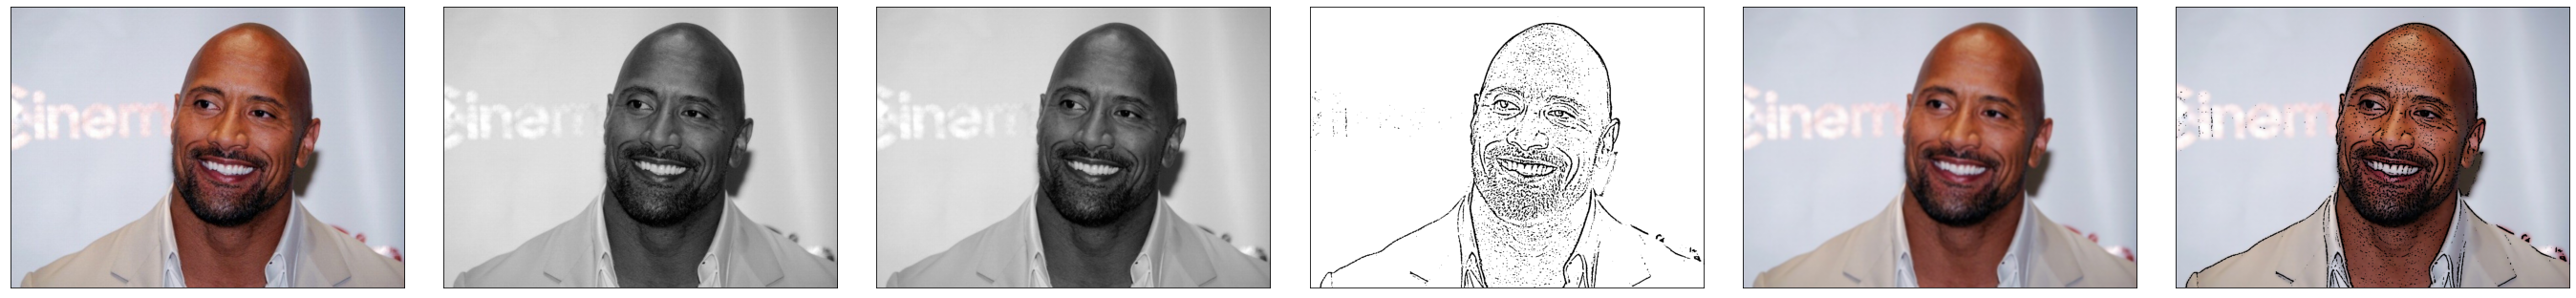

In [181]:
ImagePath = "rock (1).jpg"
cartoonify(ImagePath)

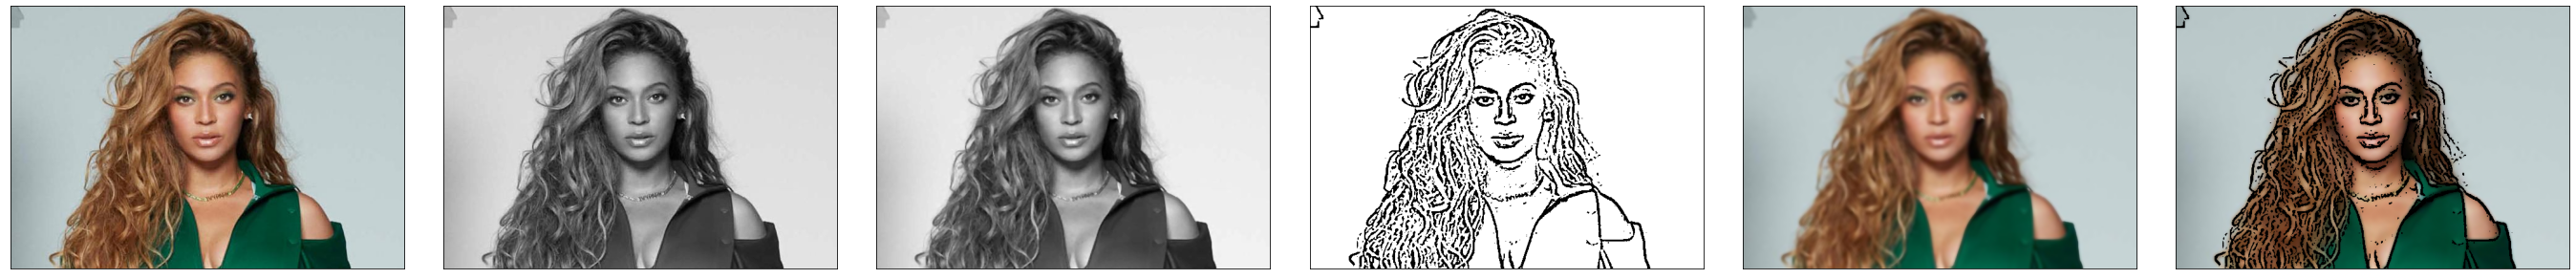

In [182]:
ImagePath = "beyonce.jpg"
cartoonify(ImagePath)

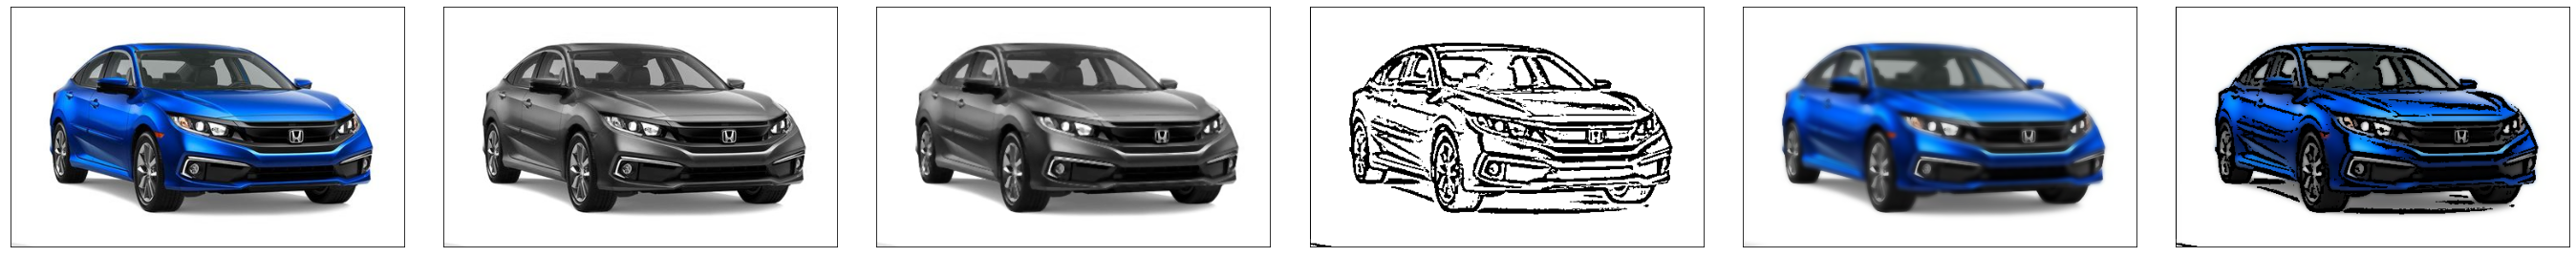

In [183]:
ImagePath = "car.jpg"
cartoonify(ImagePath)